# LIFE EXPECTANCY
Dor Mizrahi

In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time
from sklearn.linear_model import Perceptron

In [25]:
df = pd.read_csv('life_expectancy.csv')
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [26]:
df.shape

(2938, 22)

In [27]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [64]:

df.interpolate(method='linear',inplace=True)
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder
cols=[]
for col in df.columns:
    cols.append(col)




df[cols] = df[cols].apply(LabelEncoder().fit_transform)

df.sample(10)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
72,4,7,1,278,120,0,732,1384,84,0,...,71,247,80,0,2132,2278,33,32,465,116
1739,112,8,1,274,99,0,544,1798,80,0,...,68,411,76,0,1938,845,20,20,458,113
1592,101,9,1,268,108,3,45,1584,83,145,...,70,227,78,0,1939,1364,82,81,440,97
2170,143,13,1,276,117,0,812,0,86,0,...,72,569,80,0,2490,2278,42,42,418,102
1606,102,11,1,301,60,0,182,1934,83,0,...,69,586,77,0,1895,16,127,128,348,89
1223,78,10,1,269,14,22,2,0,86,329,...,72,594,80,0,2490,2278,77,79,419,100
2234,148,14,1,272,79,7,8,2052,85,146,...,71,288,79,0,2251,2278,76,74,525,129
895,57,2,1,78,301,157,74,270,87,652,...,32,293,22,45,173,1715,106,105,18,20
590,35,1,1,243,139,17,406,1554,6,3,...,57,403,6,0,1361,790,24,22,338,85
639,39,1,1,303,0,1,395,1869,6,0,...,65,514,72,0,1629,1502,22,21,393,88


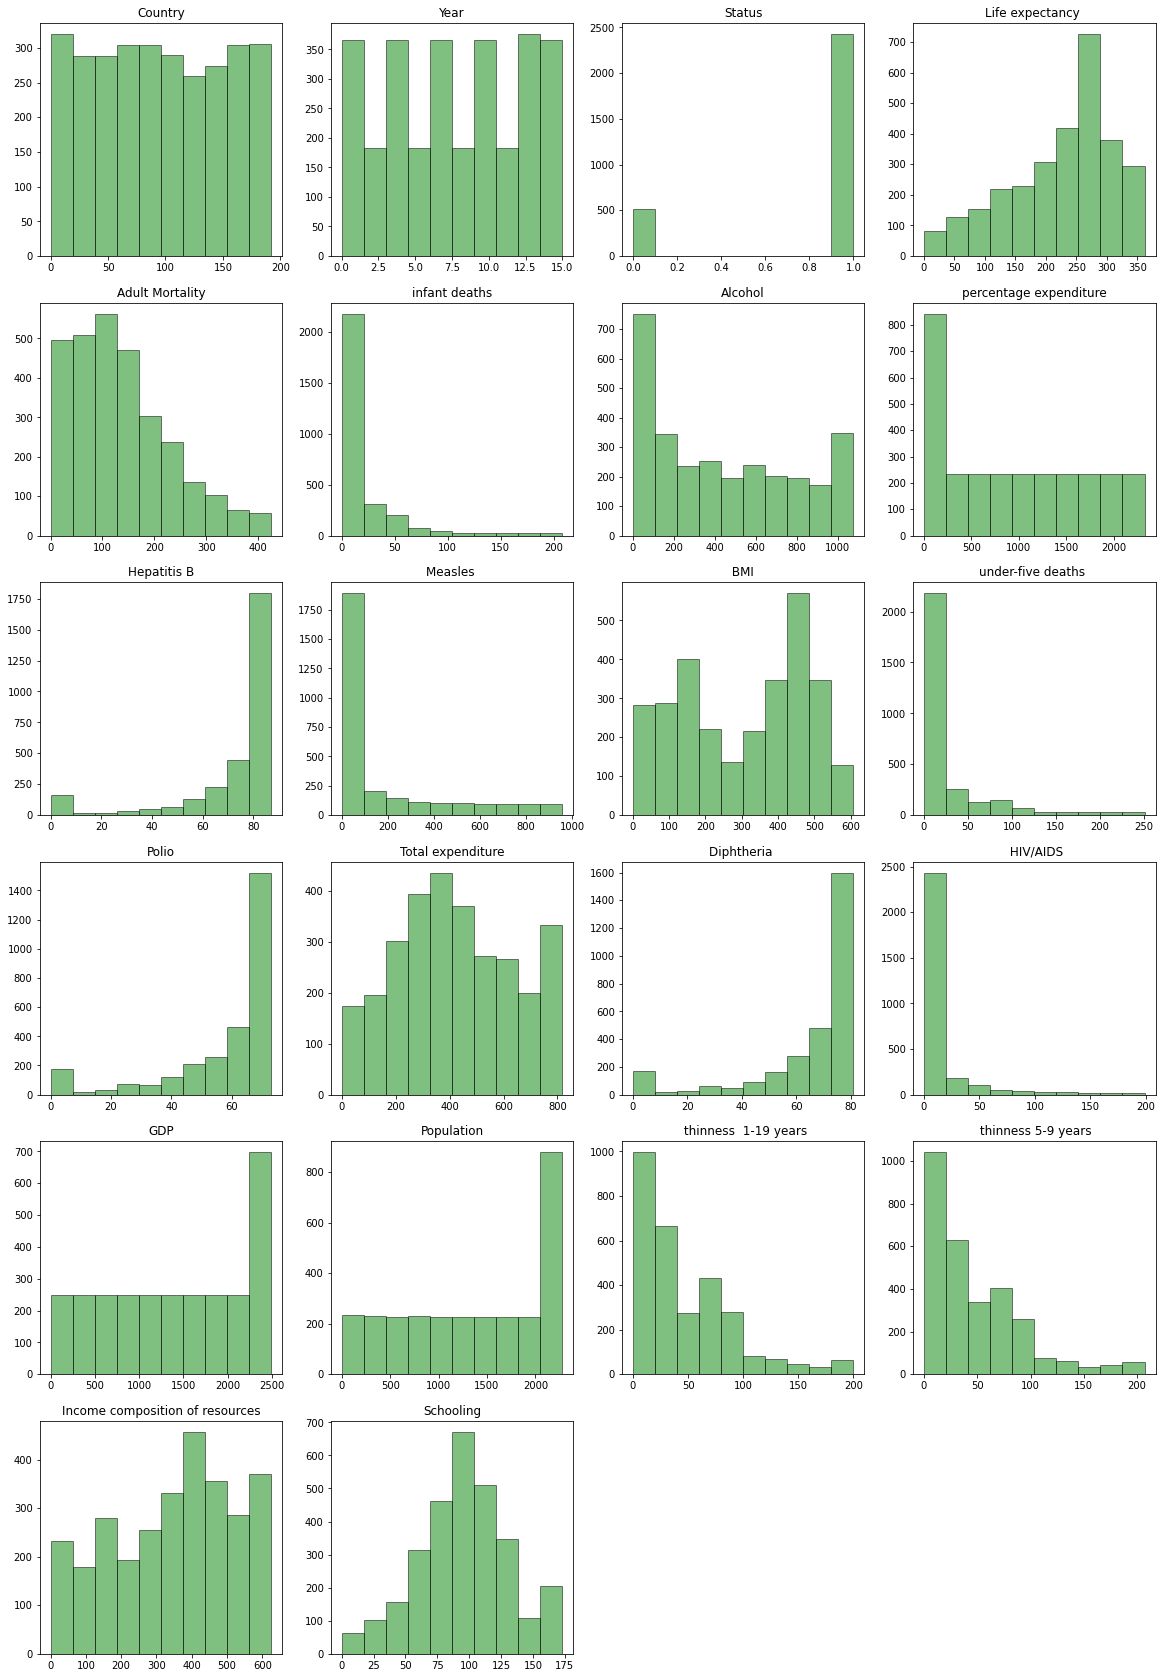

In [66]:
plt.figure(figsize=(20,30))
i = 1
for column in df.columns:
    plt.subplot(6,4,i)
    plt.hist(df[column], color='green', edgecolor = 'black', alpha = 1/2)
    plt.title(column)
    i += 1

<AxesSubplot:>

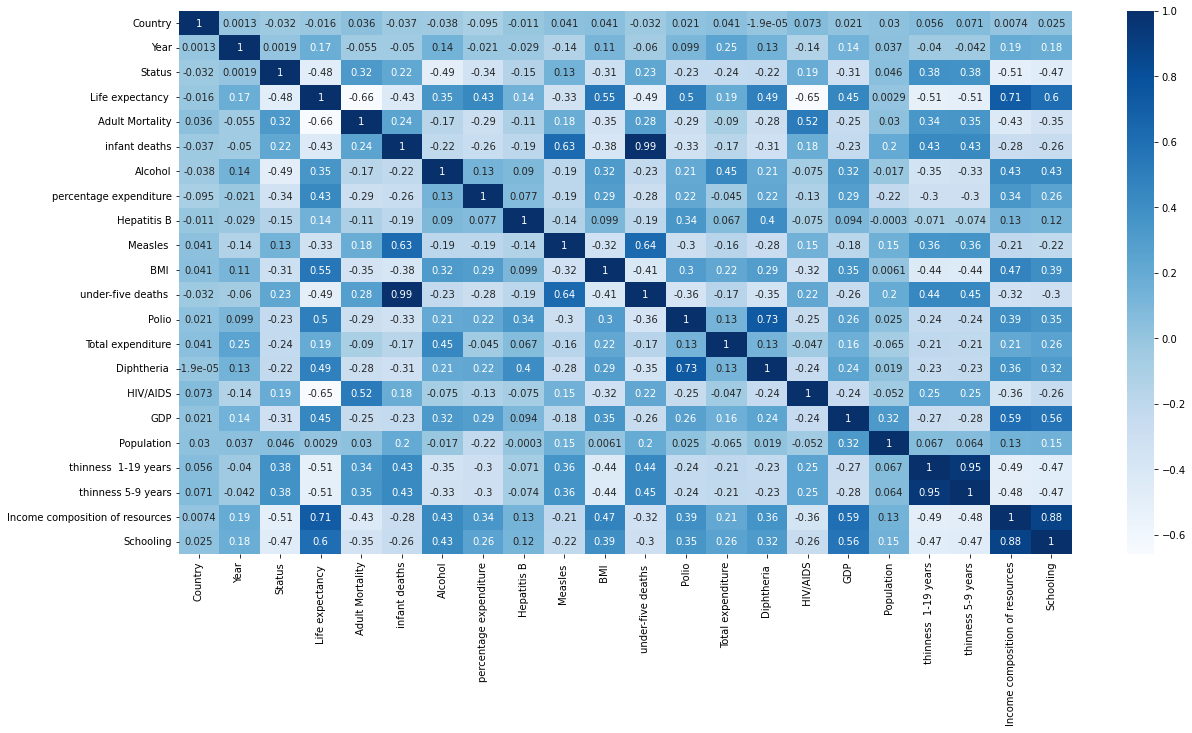

In [67]:
import plotly.express as px
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True,cmap='Blues')

In [68]:
y=df['Life expectancy ']
y.value_counts()

258    45
278    33
308    31
264    28
267    25
       ..
5       1
50      1
45      1
97      1
16      1
Name: Life expectancy , Length: 363, dtype: int64

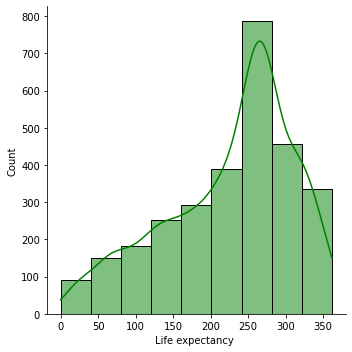

In [69]:
sns.displot(y,kde='True',color='green',bins=9)

In [70]:
X = df.drop(['Life expectancy '],axis=1)
X.shape


(2938, 21)

In [71]:
y.shape

(2938,)

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.17, random_state = 77)


# LGBM

In [73]:
import lightgbm as lgb
model=lgb.LGBMRegressor(num_leaves=10,learning_rate=0.08,n_estimators=4000,max_bin=55,bagging_fraction=0.9,bagging_freq=5,feature_fraction=0.2319,feature_fraction_seed=9, bagging_seed=9,min_data_in_leaf=15,min_sum_hessian_in_leaf=11)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
model.score(X_test,y_test)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0.9997307616374487


0.9681826368281029

In [74]:
model.score(X_test,y_test)

0.9681826368281029

# CATBOOST:

In [75]:
#train the model
import catboost as cb
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)
modelCB = cb.CatBoostRegressor(learning_rate=0.05,iterations=1500,random_strength=1)
modelCB.fit(train_dataset)

0:	learn: 82.0376617	total: 2.06ms	remaining: 3.1s
1:	learn: 78.8759793	total: 3.11ms	remaining: 2.33s
2:	learn: 76.0034650	total: 4.11ms	remaining: 2.05s
3:	learn: 73.1508750	total: 5.27ms	remaining: 1.97s
4:	learn: 70.7052292	total: 6.53ms	remaining: 1.95s
5:	learn: 68.1496275	total: 8.51ms	remaining: 2.12s
6:	learn: 65.6683239	total: 9.67ms	remaining: 2.06s
7:	learn: 63.2992158	total: 10.8ms	remaining: 2.01s
8:	learn: 61.2298857	total: 11.9ms	remaining: 1.96s
9:	learn: 59.1971302	total: 14ms	remaining: 2.09s
10:	learn: 57.2969145	total: 15.5ms	remaining: 2.1s
11:	learn: 55.3462194	total: 17.3ms	remaining: 2.15s
12:	learn: 53.6128874	total: 18.8ms	remaining: 2.15s
13:	learn: 51.9996722	total: 19.9ms	remaining: 2.12s
14:	learn: 50.4362692	total: 21.1ms	remaining: 2.09s
15:	learn: 48.8703578	total: 23ms	remaining: 2.14s
16:	learn: 47.4339100	total: 24.1ms	remaining: 2.1s
17:	learn: 45.9503389	total: 25.5ms	remaining: 2.1s
18:	learn: 44.5500120	total: 26.8ms	remaining: 2.09s
19:	learn: 

In [76]:
score=modelCB.score(test_dataset)
score

0.9719813382897913

# XGboost

In [77]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import xgboost as xgb 
from sklearn.metrics import r2_score, mean_squared_error

param_search = {
 'max_depth':(5,6,7,8),
 'min_child_weight': (1,2,3,4,5,10,15),
 'learning_rate': (0.01, 0.03, 0.05,0.07,0.1),
 'subsample': (0.7, 0.8, 0.9, 1.0),
 'alpha':(1,50,75,100,150,175),
}
estimator = xgb.XGBRegressor()
search = RandomizedSearchCV(estimator, param_search, cv=6, n_iter=6, n_jobs=-1)


search.fit(X_train, y_train)


RandomizedSearchCV(cv=6,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=6, n_jobs=-1,
                   param_distributions={'alpha': (1, 50, 75, 100, 150, 175),
                                        'learning_rate': (0.01, 0.03, 0.05,
                                                          0.07, 0.1),
                                        'max_depth': (5, 6, 7, 8),
                                        'min_child_weight': (1, 2, 3, 4, 5, 10,
                                                             15),
                                        'subsample': (0.7, 0.8, 0.9, 1.0)})

In [78]:
search.best_params_

{'subsample': 0.9,
 'min_child_weight': 4,
 'max_depth': 8,
 'learning_rate': 0.1,
 'alpha': 75}

In [79]:
search.score(X_test, y_test)

0.9658035785026104

# USING VOTING :

In [80]:
# regrresor voting
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor(estimators=[('xgb', search), ('lgbm', model), ('cb', modelCB)])
voting_regressor.fit(X_train, y_train)
voting_regressor.score(X_test, y_test)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0:	learn: 82.0376617	total: 1.39ms	remaining: 2.08s
1:	learn: 78.8759793	total: 2.7ms	remaining: 2.02s
2:	learn: 76.0034650	total: 4.01ms	remaining: 2s
3:	learn: 73.1508750	total: 5.16ms	remaining: 1.93s
4:	learn: 70.7052292	total: 6.11ms	remaining: 1.83s
5:	learn: 68.1496275	total: 7.33ms	remaining: 1.82s
6:	learn: 65.6683239	total: 8.51ms	remaining: 1.81s
7:	learn: 63.2992158	tota

0.9709660617810406

# SAVING MODEL JUST FOR EXAMPLE

In [81]:
import pickle


def save_model_to_db(model, client, db, dbconnection, model_name,score):
    import pickle
    import time
    import pymongo
    #pickling the model
    pickled_model = pickle.dumps(model)
    
    
    #saving model to mongoDB
    # creating connection
    myclient = pymongo.MongoClient(client)
    
    #creating database in mongodb
    mydb = myclient[db]
    
    #creating collection
    mycon = mydb[dbconnection]
    info = mycon.insert_one({"model": pickled_model, 'name': model_name, 'created_time':time.time(),"score": score})
    print(info.inserted_id, ' saved with this id successfully!')
    
    details = {
        'inserted_id':info.inserted_id,
        'model_name':model_name,
        'created_time':time.time()
    }
    
    return details


save_model_to_db(modelCB,'mongodb://localhost:27017',"WORK","AI","EXPECTANCY",score )

630ccb8471f2f47ffcb0785b  saved with this id successfully!


{'inserted_id': ObjectId('630ccb8471f2f47ffcb0785b'),
 'model_name': 'EXPECTANCY',
 'created_time': 1661782916.987885}

# STACKING

In [83]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression
estimators = [
    ('xgb', search), ('lgbm', model), ('cb', modelCB)
    ]
stacked_model = StackingRegressor(estimators=estimators, final_estimator=modelCB)
stacked_model.fit(X_train, y_train)
stacked_model.score(X_test, y_test)



[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0:	learn: 82.0376617	total: 2.02ms	remaining: 3.03s
1:	learn: 78.8759793	total: 3.44ms	remaining: 2.58s
2:	learn: 76.0034650	total: 4.92ms	remaining: 2.46s
3:	learn: 73.1508750	total: 6.22ms	remaining: 2.33s
4:	learn: 70.7052292	total: 7.57ms	remaining: 2.26s
5:	learn: 68.1496275	total: 8.8ms	remaining: 2.19s
6:	learn: 65.6683239	total: 10.8ms	remaining: 2.3s
7:	learn: 63.2992158	to

0.9714800651091935